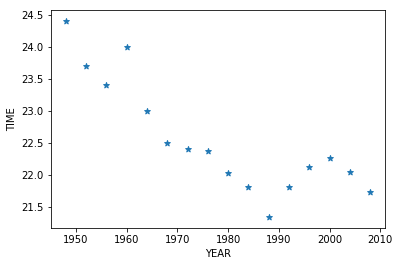

In [1]:
import numpy as np

#years
X=np.array([1948,1952,1956,1960,1964,1968,1972,1976,1980,1984,1988,1992,1996,2000,2004,2008])

#winning time
y=np.array([24.4,23.7,23.4,24,23,22.5,22.4,22.37,22.03,21.81,21.34,21.81,22.12,22.27,22.05,21.74])


%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X,y,marker="*")
plt.xlabel('YEAR')
plt.ylabel('TIME')

plt.show()
#scatter plot shows that relationship between year and winning time is not linear

In [2]:
X=X.reshape(16,1)
y=y.reshape(16,1)

#Normalizing data 
mean=np.mean(X)
std_dev=np.std(X)
X1=(X-mean)/std_dev


#augmenting training data to higher degree
X2 = np.append(X1,X1*X1, 1)
X3 = np.append(X2,X1*X1*X1, 1)
X4 = np.append(X3,X1*X1*X1*X1, 1)
X5 = np.append(X4,X1*X1*X1*X1*X1, 1)


#adding bias to training ser
new_col=np.ones((16,1))
X1 = np.append(new_col,X1, 1)
X3 = np.append(new_col,X3, 1)
X5 = np.append(new_col,X5, 1)

In [3]:
#closed form linear regression
def linear_reg(X_p,y_p):
    a=np.dot(X_p.T,X_p)
    b=np.linalg.inv(a)
    c=np.dot(b,X_p.T)
    d=np.dot(c,y_p)
    return d


#closed form linear regression with L2 regulariztion for optimation
def linear_reg_with_L2_regularation(X_p,y_p,lambd=0.1):
    a=np.dot(X_p.T,X_p)
    i=np.identity(6)
    a=a+(5*lambd*i)
    b=np.linalg.inv(a)
    c=np.dot(b,X_p.T)
    d=np.dot(c,y_p)
    return d

In [4]:
#train to get W parametrs 
w1=linear_reg(X1,y)
w3=linear_reg(X3,y)
w5=linear_reg(X5,y)
w5_l2=linear_reg_with_L2_regularation(X5,y,0.01)

In [5]:
#evaluate for training with W paramets from above 

y1_hat=[(w1[0][0]+w1[1][0]*i[1]) for i in X1]
y3_hat=[(w3[0][0]+w3[1][0]*i[1]+w3[2][0]*i[2]+w3[3][0]*i[3]) for i in X3]
y5_hat=[(w5[0][0]+w5[1][0]*i[1]+w5[2][0]*i[2]+w5[3][0]*i[3]+w5[4][0]*i[4]+w5[5][0]*i[5]) for i in X5]
y5_l2_hat=[(w5_l2[0][0]+w5_l2[1][0]*i[1]+w5_l2[2][0]*i[2]+w5_l2[3][0]*i[3]+w5_l2[4][0]*i[4]+w5_l2[5][0]*i[5]) for i in X5]

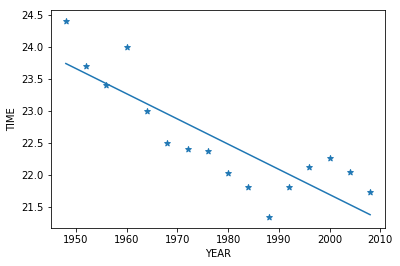

In [6]:
#result for 1st order polynomial

plt.scatter(X,y,marker="*")
plt.plot(X,y1_hat)
plt.xlabel('YEAR')
plt.ylabel('TIME')
plt.show()

In [7]:
#Root Mean Square Error for 1st order polynomial
y1_hat=np.array(y1_hat,ndmin=2).T
error=y-y1_hat
RMSE=np.sum(error*error,axis=0)

RMSE

array([3.41883118])

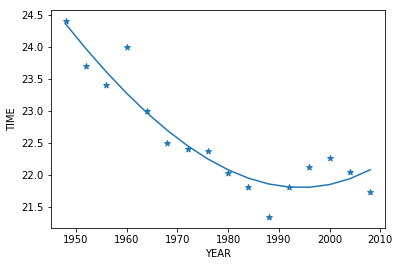

In [8]:
#result for 3rd order polynomial

plt.scatter(X,y,marker="*")
plt.plot(X,y3_hat)
plt.xlabel('YEAR')
plt.ylabel('TIME')
plt.show()

In [9]:
#Root Mean Square Error for 3rd order polynomial
y3_hat=np.array(y3_hat,ndmin=2).T
error=y-y3_hat
RMSE=np.sum(error*error,axis=0)

RMSE

array([1.39485874])

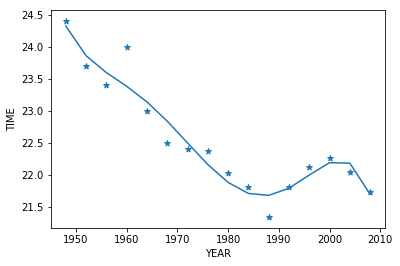

In [10]:
#result for 5th order polynomial

plt.scatter(X,y,marker="*")
plt.plot(X,y5_hat)
plt.xlabel('YEAR')
plt.ylabel('TIME')
plt.show()

In [11]:
#Root Mean Square Error for 5th order polynomial
y5_hat=np.array(y5_hat,ndmin=2).T
error=y-y5_hat
RMSE=np.sum(error*error,axis=0)

RMSE

array([0.82584449])

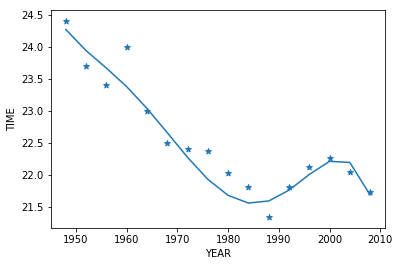

In [12]:
#result for 5th order polynomial with L2 regularization

plt.scatter(X,y,marker="*")
plt.plot(X,y5_l2_hat)
plt.xlabel('YEAR')
plt.ylabel('TIME')
plt.show()

In [13]:
#Root Mean Square Error for 5th order polynomial with L2 regularization
y5_l2_hat=np.array(y5_l2_hat,ndmin=2).T
error=y-y5_l2_hat
RMSE=np.sum(error*error,axis=0)

RMSE

array([1.05945317])

In [14]:
#Even though RMSE for 5th order polynomial is least, doest mean that it will perform well for test data
#Because the graph shows that it is overfitting the training data rather than generalization 